<a href="https://colab.research.google.com/github/itsCheithanya/KubeCasten/blob/main/bi_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#  /content/gdrive/My Drive/
import pandas as pd

df = pd.read_csv(r'/content/gdrive/My Drive/output1.csv')
df.head

<bound method NDFrame.head of                         IP Address                     Date/Time  \
0                     199.72.81.55  [01/Jul/1995:00:00:01 -0400]   
1             unicomp6.unicomp.net  [01/Jul/1995:00:00:06 -0400]   
2                   199.120.110.21  [01/Jul/1995:00:00:09 -0400]   
3               burger.letters.com  [01/Jul/1995:00:00:11 -0400]   
4                   199.120.110.21  [01/Jul/1995:00:00:11 -0400]   
...                            ...                           ...   
1048570  ix-atl10-28.ix.netcom.com  [14/Jul/1995:10:05:59 -0400]   
1048571              198.133.29.18  [14/Jul/1995:10:05:59 -0400]   
1048572              192.68.108.59  [14/Jul/1995:10:06:00 -0400]   
1048573              192.68.108.59  [14/Jul/1995:10:06:00 -0400]   
1048574         oregon.oxmol.co.uk  [14/Jul/1995:10:06:00 -0400]   

                                                   Request  
0                          "GET /history/apollo/ HTTP/1.0"  
1                       "GET /s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(y)):
	print(X[i], y[i])
print(X.shape)
print(X.shape[0])
print(X.shape[1])
...
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# for i in range(len(X)):
# 	print(X[i])
 
 


[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90
(6, 3)
6
3


In [ ]:
lst = [1,2,3,4]
lst[0:2]

[1, 2]

In [ ]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([60,70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[103.56283]]


In [ ]:
df.head

<bound method NDFrame.head of                         IP Address                     Date/Time  \
0                     199.72.81.55  [01/Jul/1995:00:00:01 -0400]   
1             unicomp6.unicomp.net  [01/Jul/1995:00:00:06 -0400]   
2                   199.120.110.21  [01/Jul/1995:00:00:09 -0400]   
3               burger.letters.com  [01/Jul/1995:00:00:11 -0400]   
4                   199.120.110.21  [01/Jul/1995:00:00:11 -0400]   
...                            ...                           ...   
1048570  ix-atl10-28.ix.netcom.com  [14/Jul/1995:10:05:59 -0400]   
1048571              198.133.29.18  [14/Jul/1995:10:05:59 -0400]   
1048572              192.68.108.59  [14/Jul/1995:10:06:00 -0400]   
1048573              192.68.108.59  [14/Jul/1995:10:06:00 -0400]   
1048574         oregon.oxmol.co.uk  [14/Jul/1995:10:06:00 -0400]   

                                                   Request  
0                          "GET /history/apollo/ HTTP/1.0"  
1                       "GET /s

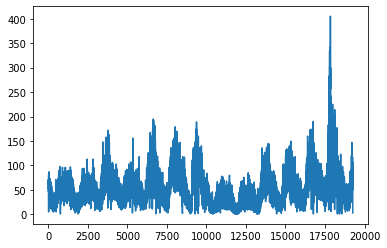

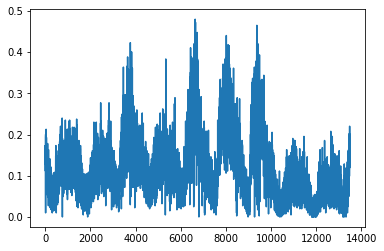

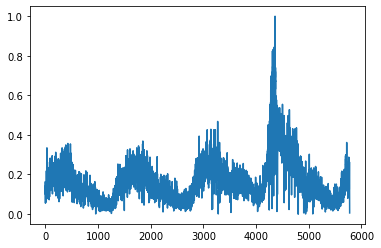

[[0.14851485]
 [0.13861386]
 [0.17326733]
 ...
 [0.19306931]
 [0.22029703]
 [0.1460396 ]]


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv('/content/gdrive/My Drive/output2.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
plt.plot(train)
plt.show()

plt.plot(test)
plt.show()

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(train)


In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional



In [ ]:
# define model
# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(trainX, trainY, epochs=20, batch_size=10, verbose=0)
# demonstrate prediction


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              20800     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

181/181 [==============================] - 0s 3ms/step


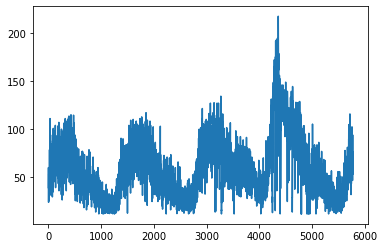

In [ ]:

plt.plot(testPredict)
plt.show()


Train Score: 17.11 RMSE
Test Score: 26.73 RMSE


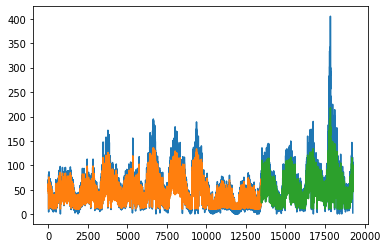

In [ ]:
from sklearn.metrics import mean_squared_error
#  calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
model.save('/content/gdrive/My Drive/model0.h5')

In [ ]:
model.save_weights('path_to_saved_weights.h5')